In [18]:
import shap
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [5]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



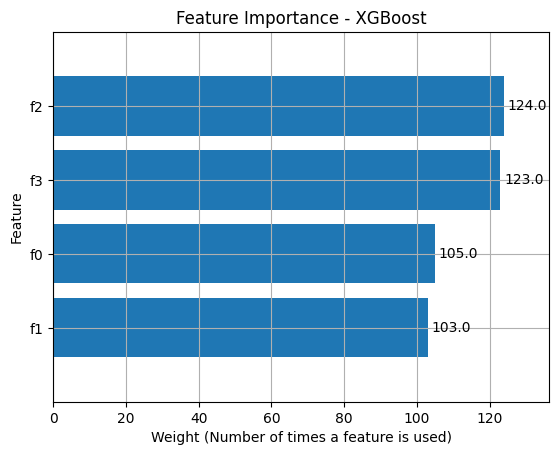

In [6]:
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8, 
                    show_values=True, 
                    xlabel='Weight (Number of times a feature is used)', 
                    ylabel='Feature')
plt.title("Feature Importance - XGBoost")

plt.show()

In [63]:
explainer = shap.Explainer(model, X_test, feature_names=iris.feature_names)
explaination = explainer(X_test)

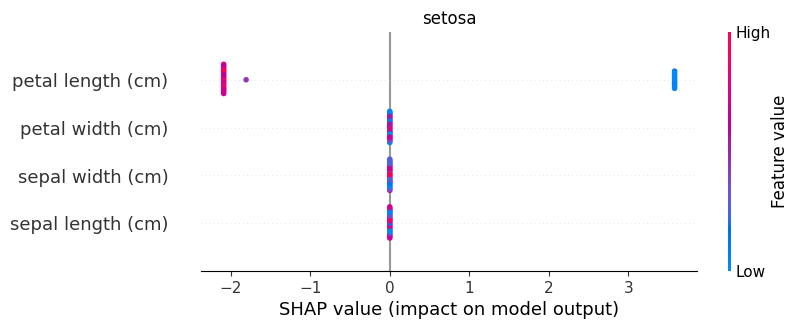

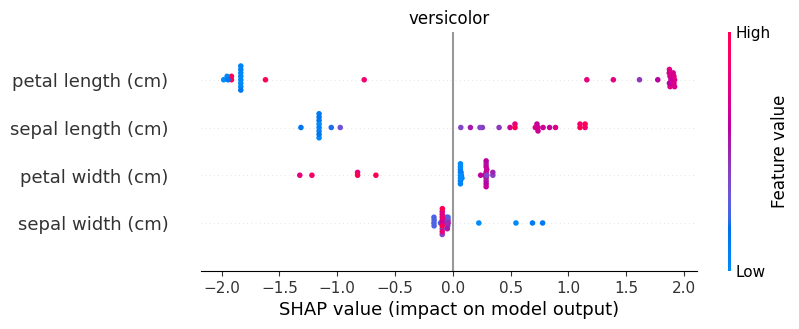

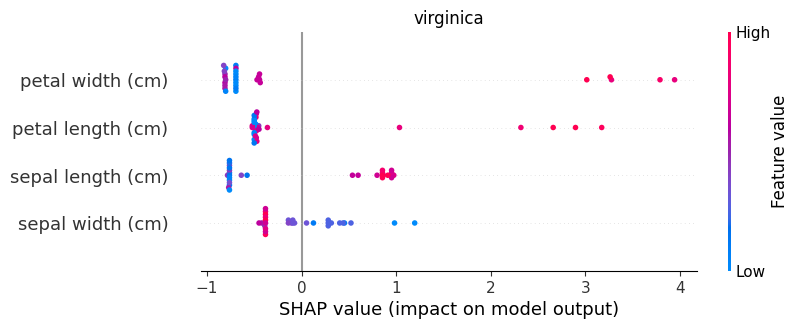

In [64]:
for i in range(len(iris.target_names)):
    plt.title(iris.target_names[i])
    shap.plots.beeswarm(explaination[:, :, i])


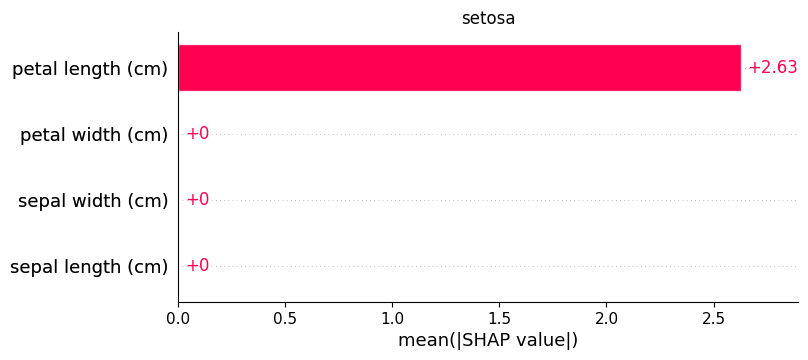

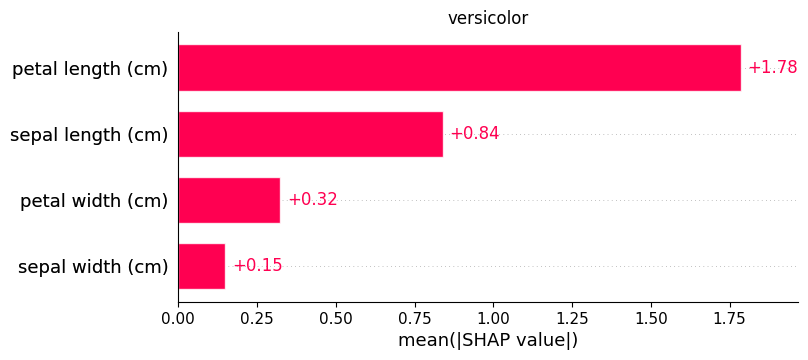

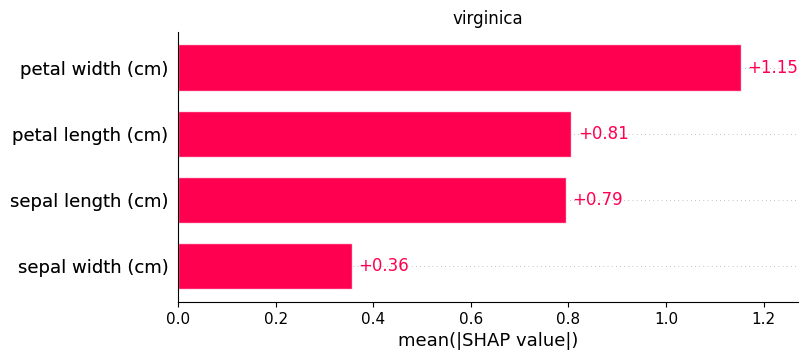

In [65]:
for i in range(len(iris.target_names)):
    plt.title(iris.target_names[i])
    shap.plots.bar(explaination[:, :, i])

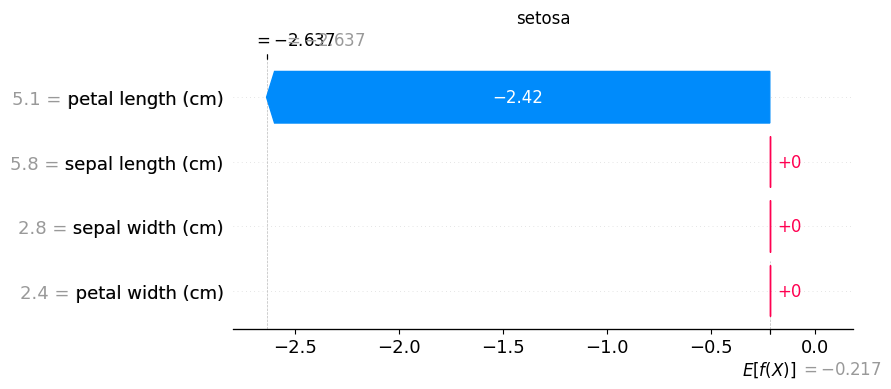

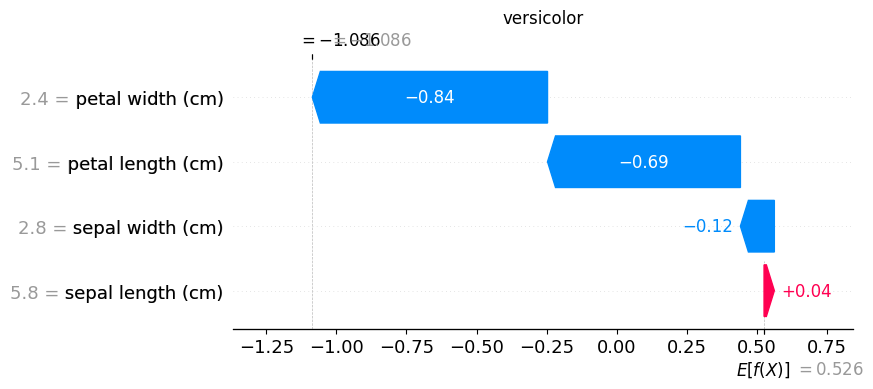

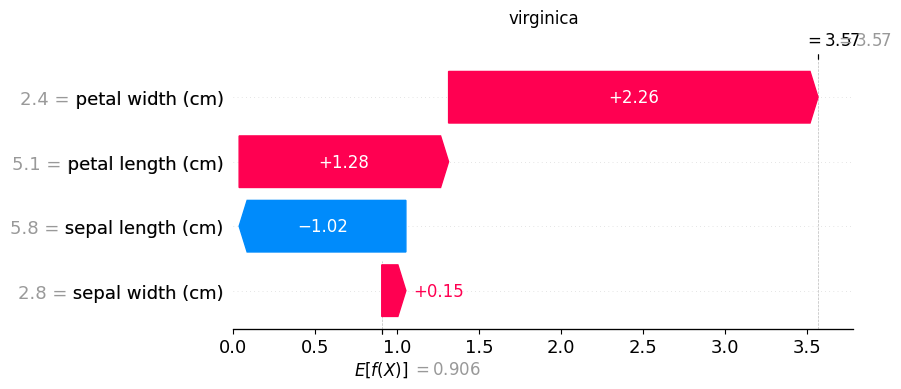

In [10]:
for i in range(len(iris.target_names)):
    plt.title(iris.target_names[i])
    shap.plots.waterfall(explaination[0, :, i])

In [11]:
model.predict_proba(X_test[0].reshape(1, -1))

array([[0.00199192, 0.00939847, 0.9886097 ]], dtype=float32)

In [12]:
explainer(X_test[0].reshape(1, -1)).values

array([[[ 0.        ,  0.03669516, -1.0183151 ],
        [ 0.        , -0.12106161,  0.14746481],
        [-2.4202876 , -0.6882264 ,  1.2790751 ],
        [ 0.        , -0.839136  ,  2.25608   ]]], dtype=float32)

In [13]:
str(iris.target_names[model.predict(X_test[0].reshape(1, -1))[0]])

'virginica'

Sample:
  sepal length (cm): 7.3
  sepal width (cm): 2.9
  petal length (cm): 6.3
  petal width (cm): 1.8
Predicted: virginica
Probabilities: [[3.7222094e-04 6.9925538e-04 9.9892849e-01]]
Explanations:
  sepal length (cm): 0.5623766183853149
  sepal width (cm): -0.07871323823928833
  petal length (cm): 1.6295232772827148
  petal width (cm): 2.2388665676116943


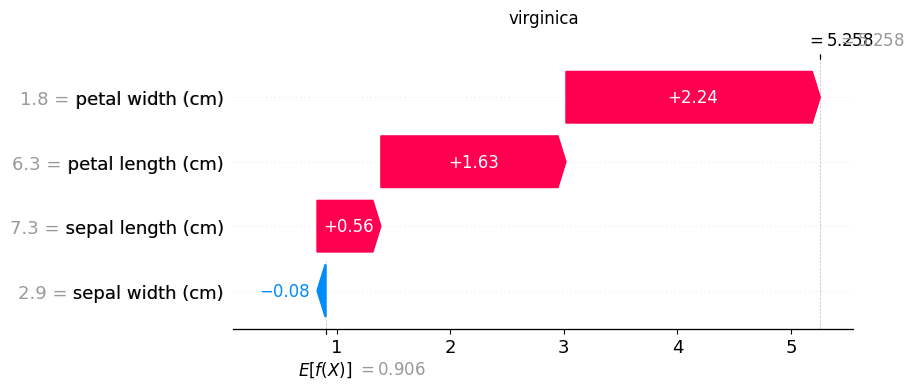

In [14]:
test_sample = 3

print(f'Sample:')
for i in range(len(iris.feature_names)):
    print(f"  {str(iris.feature_names[i])}: {X_test[test_sample, i]}")

predicted = model.predict(X_test[test_sample].reshape(1, -1))[0]
    
print(f'Predicted: {str(iris.target_names[predicted])}')
print(f'Probabilities: {model.predict_proba(X_test[test_sample].reshape(1, -1))}')
print(f'Explanations:')
for i in range(len(iris.feature_names)):
    print(f"  {str(iris.feature_names[i])}: {explaination[test_sample, :, predicted].values[i]}")
 
plt.title(iris.target_names[predicted])
shap.plots.waterfall(explaination[test_sample, :, predicted])

In [15]:
type(model)

xgboost.sklearn.XGBClassifier

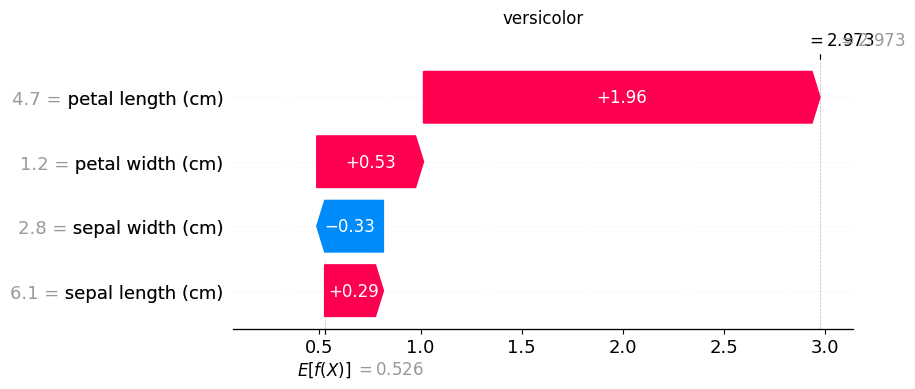

Predicted versicolor with 98.712% confidence
Feature Importance SHAP values:
  sepal length (cm): 0.2906035780906677
  sepal width (cm): -0.32935675978660583
  petal length (cm): 1.9585554599761963
  petal width (cm): 0.5273882746696472



In [61]:
def predict(sepal_length, sepal_width, petal_length, petal_width, feature_importance=False):
    test_array = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1, -1)
    predicted = model.predict(test_array)[0]
    prob = model.predict_proba(test_array)[0][predicted] * 100
    result = f'Predicted {str(iris.target_names[predicted])} with {prob:.3f}% confidence'

    if feature_importance:
        result += "\nFeature Importance SHAP values:\n"
        explanation = explainer(test_array)
        for i in range(len(iris.feature_names)):
            result += f"  {str(iris.feature_names[i])}: {explanation[0, :, predicted].values[i]}\n"
        plt.title(iris.target_names[predicted])
        shap.plots.waterfall(explanation[0, :, predicted])
    return result

print(predict(6.1, 2.8, 4.7, 1.2, feature_importance=True))

In [31]:
X_test[2]

array([5.5, 4.2, 1.4, 0.2])

In [34]:
test_sample = 2
predicted = model.predict(X_test[test_sample].reshape(1, -1))[0]
    
print(f'Predicted: {str(iris.target_names[predicted])}')
print(f'Probabilities: {model.predict_proba(X_test[test_sample].reshape(1, -1))}')

Predicted: setosa
Probabilities: [[9.8995095e-01 9.1619343e-03 8.8708207e-04]]


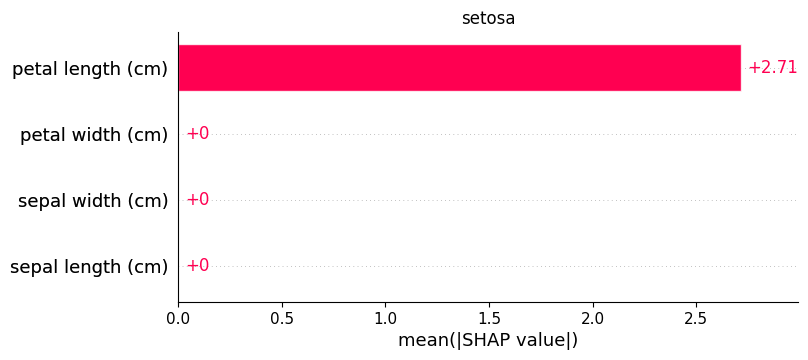

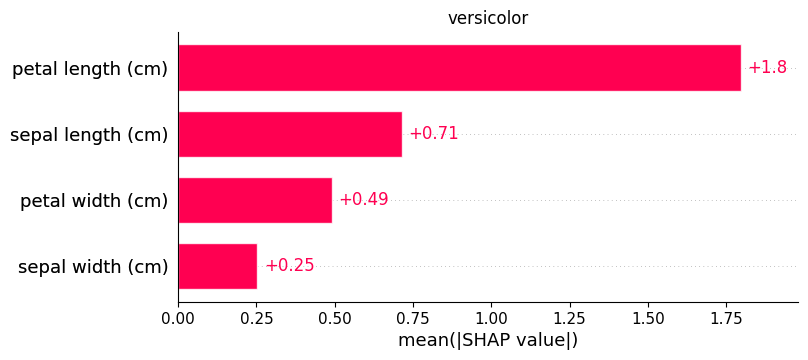

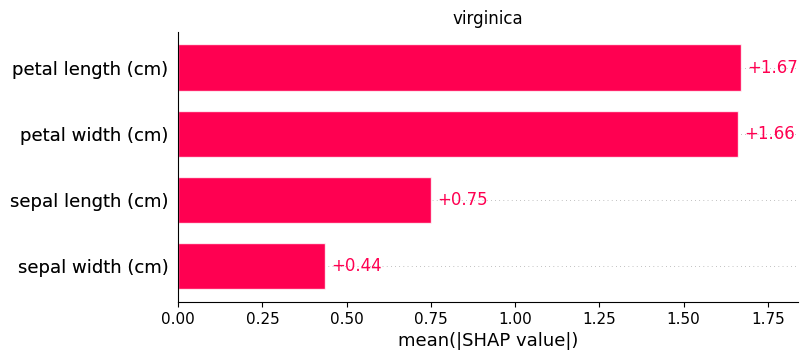

In [67]:
explainer = shap.Explainer(model, feature_names=iris.feature_names)
explanation = explainer(X_test)

for i in range(len(iris.target_names)):
    plt.title(iris.target_names[i])
    shap.plots.bar(explanation[:, :, i])

In [79]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X)

def get_confusion_matrix(y_true, y_pred):
    return str(confusion_matrix(y_true, y_pred))

print(get_confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [80]:
def get_accuracy_score(y_true, y_pred):
    return str(accuracy_score(y_true, y_pred))

print(get_accuracy_score(y, y_pred))

1.0


In [92]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=iris.target_names)
    return report

print(get_classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



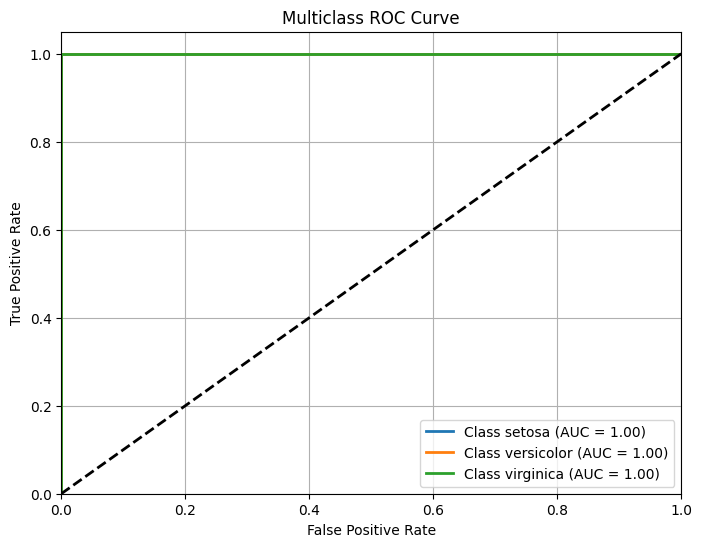

In [97]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_proba = model.predict_proba(X)

def plot_multiclass_roc_curve( y_true, y_pred_proba, class_names):
    """
    Plot ROC curves for multiclass classification using One-vs-Rest strategy.

    Parameters:
    - y_true: true labels (not one-hot)
    - y_pred_proba: predicted probabilities from model.predict_proba()
    - class_names: list of class names (e.g., ['setosa', 'versicolor', 'virginica'])
    """
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    n_classes = y_true_bin.shape[1]

    plt.figure(figsize=(8, 6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Class {class_names[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_multiclass_roc_curve(y, y_proba, iris.target_names)

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model):
    if X.shape[1] != 2:
        raise ValueError("plot_decision_boundaries only supports 2D feature space")

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundaries(X, y, model)

ValueError: plot_decision_boundaries only supports 2D feature space

In [100]:
import pickle
with open("iris_xgboost_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)